In [1]:
import torch
import torch.nn as nn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
sys.path.insert(0, os.path.abspath("/Users/marcdanielregistre/machine_learning/pytorch"))
from helper_functions import plot_predictions, plot_decision_boundary


In [2]:


# get dummy data using sklearn datasets 
n_samples = 1000
X, y = make_circles(n_samples=n_samples, shuffle=True, noise=0.02, random_state=42)
len(X), len(y)
print(f"Print first 5 items in X:\n {X[:5]}")
print(f"Print first 5 items in y:\n {y[:5]}")

# from the output , we have 2 features label


Print first 5 items in X:
 [[ 0.76026594  0.22387823]
 [-0.76722217  0.1455425 ]
 [-0.80815854  0.14894355]
 [-0.3760283   0.70320906]
 [ 0.44051035 -0.89761737]]
Print first 5 items in y:
 [1 1 1 1 0]


In [3]:
# make dataframe of circle data
circles = pd.DataFrame({'X1': X[:,0], 
                        'X2': X[:,1], 
                        'label': y})
circles.head(10)


,X1,X2,label
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0
5,-0.484527,0.660633,1
6,-0.012450,0.802211,1
7,0.777458,0.141876,1
8,-0.166138,-0.790265,1
9,-0.126921,1.011160,0


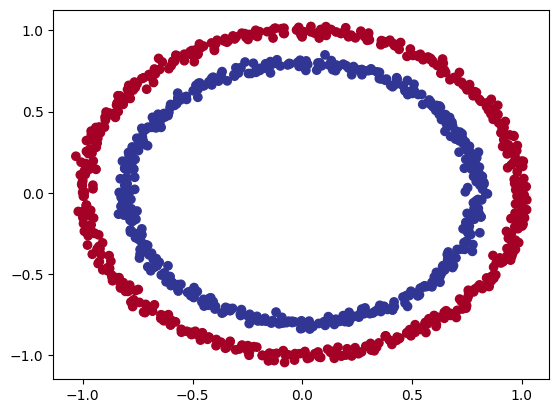

In [4]:
# visualize with matplotlib
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# turn data to tensor because pytorch requires tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[5], y[5]

(tensor([-0.4845,  0.6606]), tensor(1.))

In [7]:
# split data - the old way
#split = int(0.8*len(X))
#X_train = X[:split]
#y_train = y[:split]
#X_test = X[split:]
#y_test = y[split:]

#len(X_train), len(y_train), len(X_test), len(y_test)

In [8]:
# another way is to use sklearn model selection train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [9]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=2,
                                 out_features=5)
        self.linear2 = nn.Linear(in_features=5,
                                 out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor :
        return self.linear2(self.linear1(x)) # x-> linear1 -> linear2 -> output

In [1]:
# graphing

NameError: name 'BinaryClassification' is not defined

In [1]:
model0 = BinaryClassification()
model0.state_dict()

NameError: name 'BinaryClassification' is not defined

In [10]:
model0 = BinaryClassification()
model0.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.0748, -0.0515],
                      [ 0.5558,  0.3038],
                      [ 0.0360, -0.4543],
                      [ 0.2191,  0.0628],
                      [ 0.0770, -0.4256]])),
             ('linear1.bias',
              tensor([ 0.2167,  0.2038,  0.0783, -0.2934,  0.3766])),
             ('linear2.weight',
              tensor([[ 0.1417,  0.1779, -0.4169,  0.2725,  0.3703]])),
             ('linear2.bias', tensor([-0.1729]))])

In [10]:
model0 = BinaryClassification()
model0.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.0748, -0.0515],
                      [ 0.5558,  0.3038],
                      [ 0.0360, -0.4543],
                      [ 0.2191,  0.0628],
                      [ 0.0770, -0.4256]])),
             ('linear1.bias',
              tensor([ 0.2167,  0.2038,  0.0783, -0.2934,  0.3766])),
             ('linear2.weight',
              tensor([[ 0.1417,  0.1779, -0.4169,  0.2725,  0.3703]])),
             ('linear2.bias', tensor([-0.1729]))])

In [11]:
# loss function: binary cross entropy with sigmoid as activation layer.
loss_fn = torch.nn.BCEWithLogitsLoss() # the output of loss function will be logits

# optimizer: Stochastic Gradient Descent
optimizer = torch.optim.SGD(model0.parameters(), lr=0.001)

X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [12]:
# Evaluation Metric.
## Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred))*100
    return acc
    

Train Loss: 0.6930392384529114, Accuracy: 50.375%, Test Loss: 0.6951658129692078, Test Accuracy: 47.0%
Train Loss: 0.6930309534072876, Accuracy: 50.625%, Test Loss: 0.6951188445091248, Test Accuracy: 46.5%
Train Loss: 0.6930238604545593, Accuracy: 51.24999999999999%, Test Loss: 0.6950763463973999, Test Accuracy: 47.0%
Train Loss: 0.6930177211761475, Accuracy: 50.875%, Test Loss: 0.6950381398200989, Test Accuracy: 46.5%
Train Loss: 0.6930124759674072, Accuracy: 50.875%, Test Loss: 0.6950038075447083, Test Accuracy: 47.0%
Train Loss: 0.6930078864097595, Accuracy: 50.74999999999999%, Test Loss: 0.694972813129425, Test Accuracy: 47.0%
Train Loss: 0.6930040121078491, Accuracy: 50.875%, Test Loss: 0.6949450969696045, Test Accuracy: 47.5%
Train Loss: 0.6930006146430969, Accuracy: 51.24999999999999%, Test Loss: 0.6949201822280884, Test Accuracy: 46.5%
Train Loss: 0.6929976940155029, Accuracy: 51.125%, Test Loss: 0.6948977708816528, Test Accuracy: 46.5%
Train Loss: 0.6929951310157776, Accuracy:

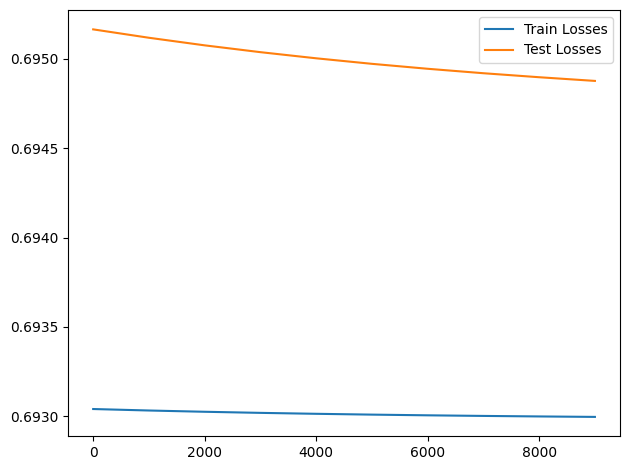

In [15]:
# Train
torch.manual_seed(42)
epochs = 10000
train_losses = []
test_losses = []
epoch_count = []

for epoch in range(epochs):
    model0.train() # set model to raining mode
    
    # ---- Forward (train) ----
    
    logits = model0(X_train).squeeze() # squeeze removes a dimension so logits matches y_train
    loss = loss_fn(logits, y_train)      # use logits for BCEWithLogitsLoss: this loss function is more stable
                                        ## BCEWithLogitsLoss expects logits as input compare to BCDLoss which would expect predictions.
    
    y_preds = torch.round(torch.sigmoid(logits)) # to make prediction we manual pass the logits to sigmoid activation function.
    
    acc = accuracy_fn(y_true=y_train, y_pred=y_preds.to(y_train.dtype))

    # ---- Backprop ----
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Test
    model0.eval()

    with torch.inference_mode():
        y_test_logits = model0(X_test).squeeze()
        y_test_loss = loss_fn(y_test_logits, y_test)

        y_test_preds = torch.round(torch.sigmoid(y_test_logits))
        test_acc = accuracy_fn(y_true=y_test, y_pred=y_test_preds)
        
        if epoch % 1000 == 0:
            print(f"Train Loss: {loss}, Accuracy: {acc}%, Test Loss: {y_test_loss}, Test Accuracy: {test_acc}%")
            train_losses.append(loss.item())
            test_losses.append(y_test_loss.item())
            epoch_count.append(epoch)


plt.plot(epoch_count, train_losses, label='Train Losses')
plt.plot(epoch_count, test_losses, label='Test Losses')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
The issue with this version is that the accuracy is 51% which is not good.

tensor([[-0.3815,  0.6872],
        [-0.0065,  0.9729],
        [-0.7112, -0.3203],
        [-0.3011,  0.9586],
        [ 0.4112, -0.7210]])

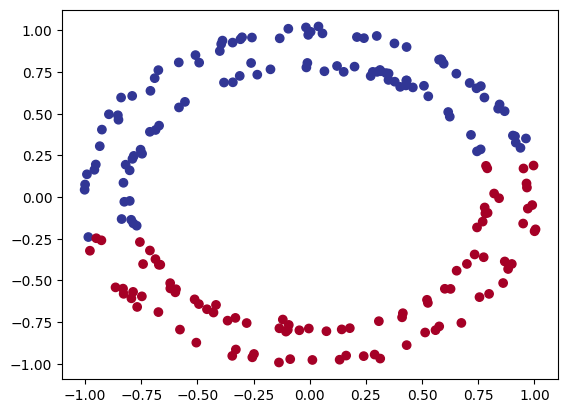

In [27]:
#
model0.eval()
with torch.inference_mode():
    yLogits = model0(X_test)
    y_pred = torch.round(torch.sigmoid(yLogits))
    # visualize with matplotlib
    plt.scatter(x=X_test[:,0],
            y=X_test[:,1],
            c=y_pred,
            cmap=plt.cm.RdYlBu)